In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from prophet import Prophet
from sklearn.ensemble import IsolationForest

In [42]:
df = pd.read_csv('df_clean_v2.csv')

In [43]:
df

,tank100_temperature,tank200_temperature,tank300_temperature,tank400_temperature,tank100_pressure,tank200_pressure,tank300_pressure,tank400_pressure,tank100_station3_program_run,tank200_station3_program_run,...,tank400_station4_flow_rate,tank100_station5_quantity_selected,tank100_station5_flow_rate,tank200_station5_quantity_selected,tank200_station5_flow_rate,tank300_station5_quantity_selected,tank300_station5_flow_rate,tank400_station5_quantity_selected,tank400_station5_flow_rate,Timestamp
0,71.304199,28.074915,70.740761,71.908691,1.729645,1.669113,-0.056244,1.418671,0,0,...,-0.046997,1667,-0.044327,0,-0.051575,1048,-0.078964,1119,-0.042496,4/30/24 15:43
1,71.303558,28.075108,70.739029,71.910446,2.108749,1.668274,-0.047394,1.419708,0,0,...,-0.052567,1667,-0.043335,0,-0.054626,1048,-0.067368,1119,-0.038300,4/30/24 15:43
2,71.303177,28.074392,70.742981,71.910446,2.410660,4.193314,-0.028687,1.302017,0,0,...,-0.049667,1667,-0.040283,0,-0.051117,1048,-0.071335,1119,-0.041733,4/30/24 15:43
3,71.325233,28.073294,70.741859,71.909592,10.575425,19.880661,12.796706,29.323227,0,1,...,-0.053864,1667,-0.053558,0,-0.053711,1048,-0.078506,1119,-0.041885,4/30/24 15:43
4,71.297272,28.070629,70.741440,71.914780,11.344177,19.783142,12.850983,38.110352,0,1,...,-0.051422,1667,-0.050812,0,-0.052948,1048,-0.080795,1119,-0.045090,4/30/24 15:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2044,71.047958,28.076069,70.431908,71.799896,10.638169,19.616257,12.991164,36.208649,0,0,...,-0.051575,1269,-0.048828,1791,-0.051117,847,-0.067291,264,-0.032272,4/30/24 16:24
2045,71.052223,28.079666,70.461319,71.796524,10.580735,19.557449,13.017029,36.186890,0,0,...,-0.049362,1269,-0.051651,1791,-0.052643,847,-0.074005,264,-0.035095,4/30/24 16:24
2046,71.052032,28.051762,70.473740,71.791824,10.165573,19.650101,12.880280,36.147400,0,0,...,-0.050201,1269,-0.049973,1791,-0.053940,847,-0.079803,264,-0.044785,4/30/24 16:24
2047,71.047913,28.075710,70.489120,71.776657,10.344468,19.041092,12.919037,36.101608,0,0,...,-0.052567,1269,-0.048141,1791,0.389175,847,-0.081711,264,-0.035095,4/30/24 16:24


In [44]:
anomaly_columns = ['tank100_temperature', 'tank200_temperature', 'tank300_temperature',
       'tank400_temperature', 'tank100_pressure', 'tank200_pressure',
       'tank300_pressure', 'tank400_pressure', 'all_tanks_station3_flow_rate', 
       'tank100_station4_flow_rate', 'tank200_station4_flow_rate', 'tank300_station4_flow_rate',
       'tank400_station4_flow_rate','tank100_station5_flow_rate','tank200_station5_flow_rate',
        'tank300_station5_flow_rate',
       'tank400_station5_flow_rate',
       ]

In [45]:
df.columns

Index(['tank100_temperature', 'tank200_temperature', 'tank300_temperature',
       'tank400_temperature', 'tank100_pressure', 'tank200_pressure',
       'tank300_pressure', 'tank400_pressure', 'tank100_station3_program_run',
       'tank200_station3_program_run', 'tank300_station3_program_run',
       'tank400_station3_program_run', 'tank100_station4_program_run',
       'tank200_station4_program_run', 'tank300_station4_program_run',
       'tank400_station4_program_run', 'tank100_station5_program_run',
       'tank200_station5_program_run', 'tank300_station5_program_run',
       'tank400_station5_program_run', 'tank100_station3_valve_run',
       'tank200_station3_valve_run', 'tank300_station3_valve_run',
       'all_tanks_station3_flow_rate', 'all_tanks_station3_quantity_selected',
       'tank100_station4_flow_rate', 'tank100_station4_quantity_selected',
       'tank200_station4_flow_rate', 'tank200_station4_quantity_selected',
       'tank300_station4_quantity_selected', 'tank300_s

In [46]:
# Perform anomaly detection for each column
for column in anomaly_columns:
    # Fit Isolation Forest model
    model = IsolationForest(contamination=0.001)  # Adjust contamination based on expected outlier ratio
    model.fit(df[[column]])

    # Based on current data forcast for next 5 min of data with frequency 1 sec
 
    # Predict anomalies
    anomalies = model.predict(df[[column]])
    df[column+'_is_anomaly'] = anomalies

In [47]:
df['tank200_station5_flow_rate_is_anomaly'].value_counts()

tank200_station5_flow_rate_is_anomaly
 1    2046
-1       3
Name: count, dtype: int64

In [48]:
output_df = df.copy()

In [49]:
output_df['Timestamp'] = pd.to_datetime(output_df['Timestamp'])

/var/folders/b9/79c0vj9575g01hz6pjr3n7800000gn/T/ipykernel_7586/4118174965.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  output_df['Timestamp'] = pd.to_datetime(output_df['Timestamp'])


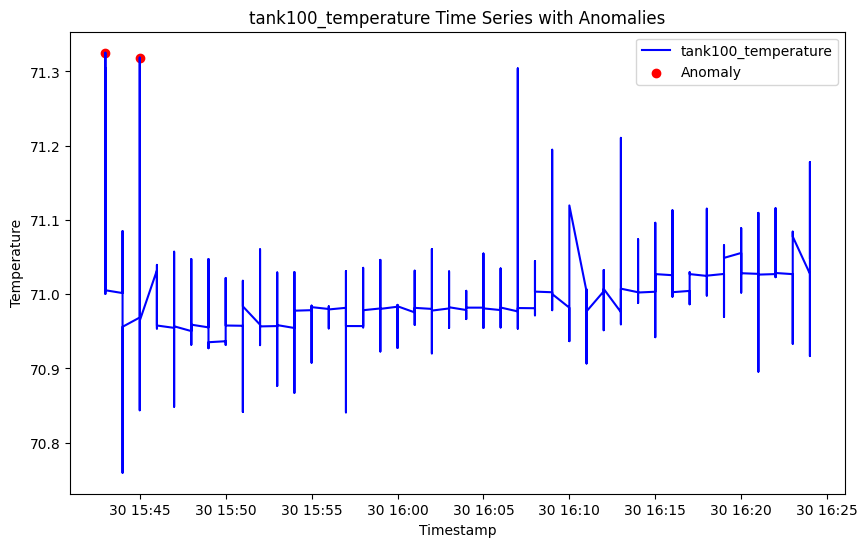

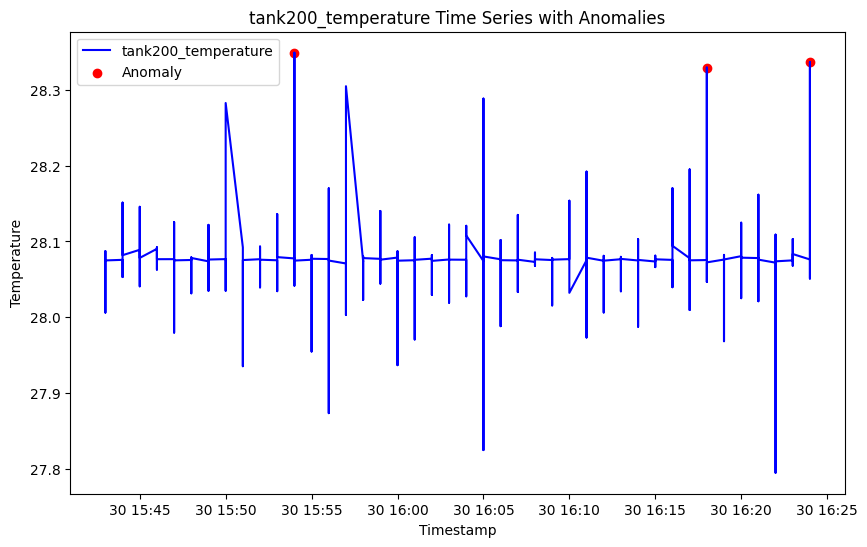

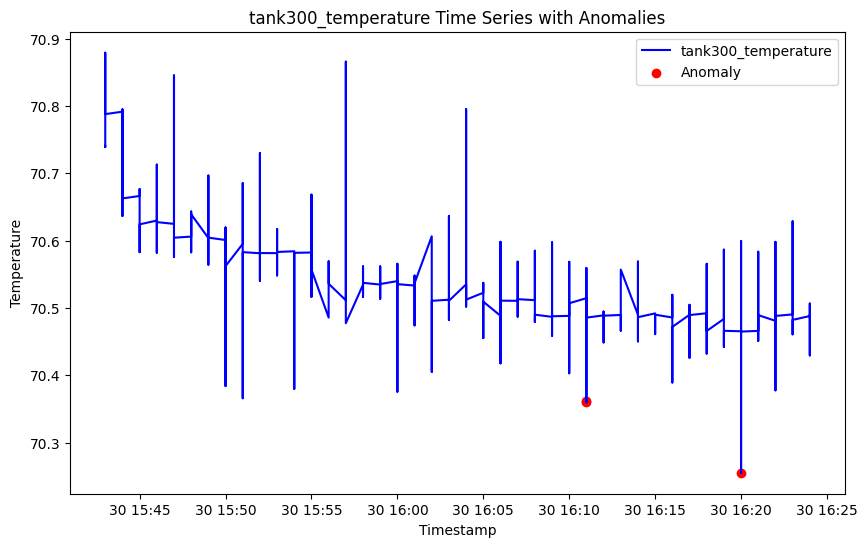

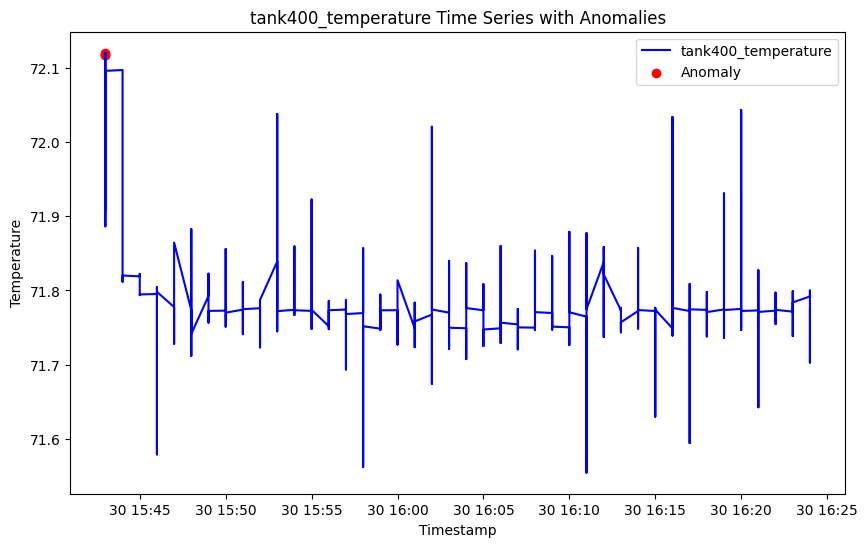

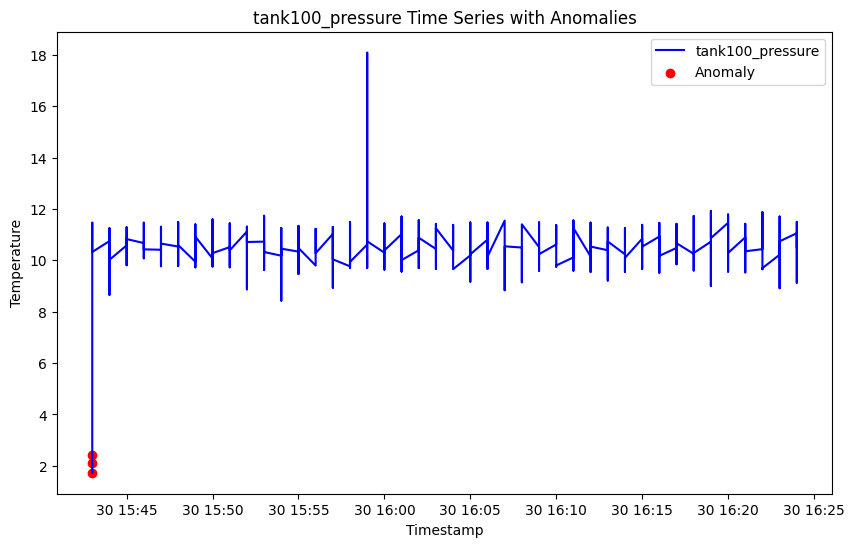

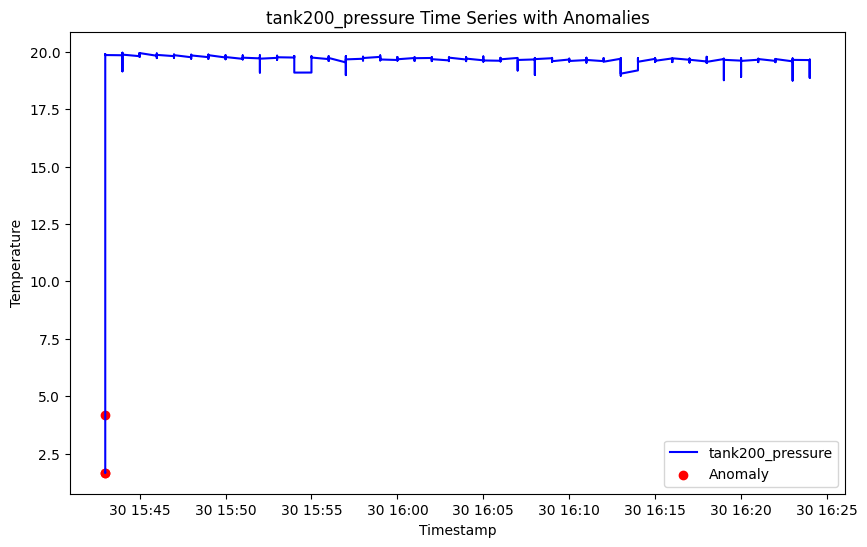

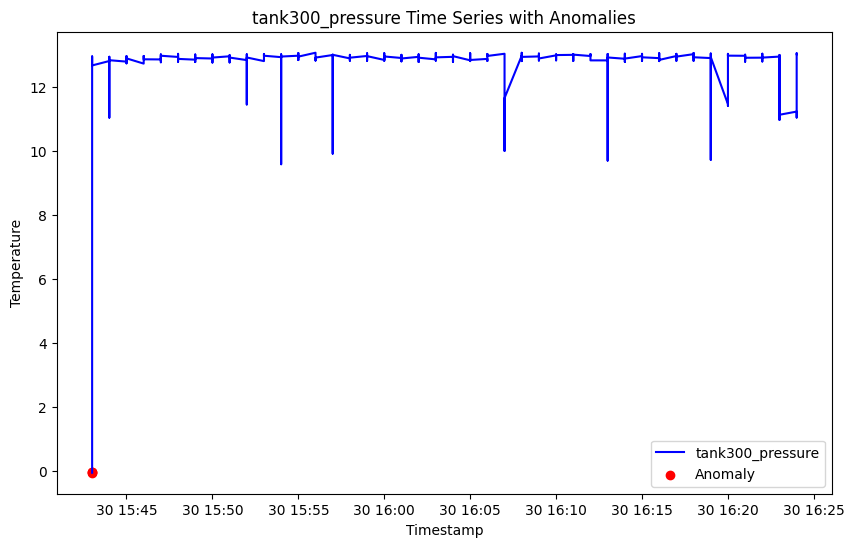

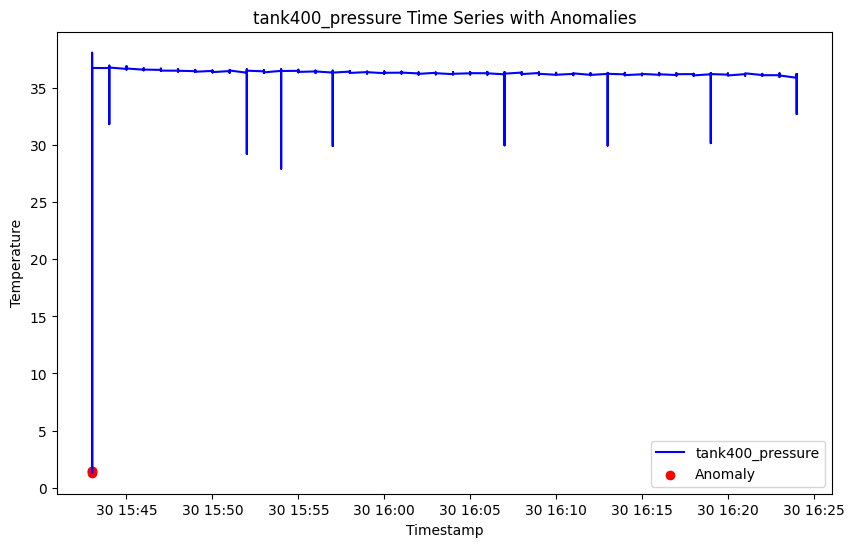

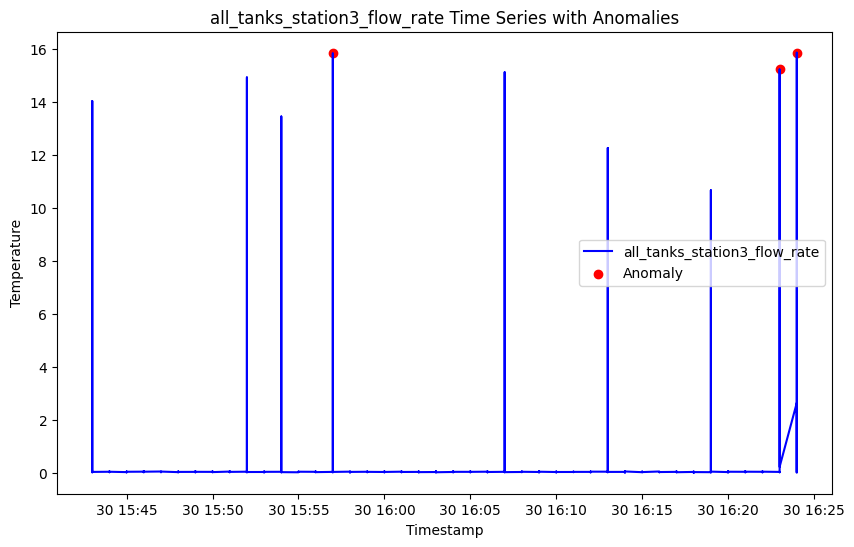

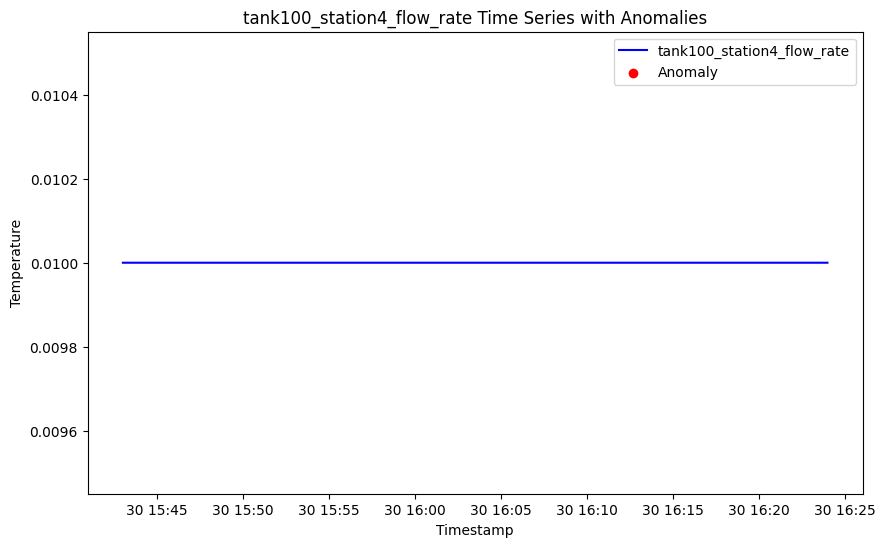

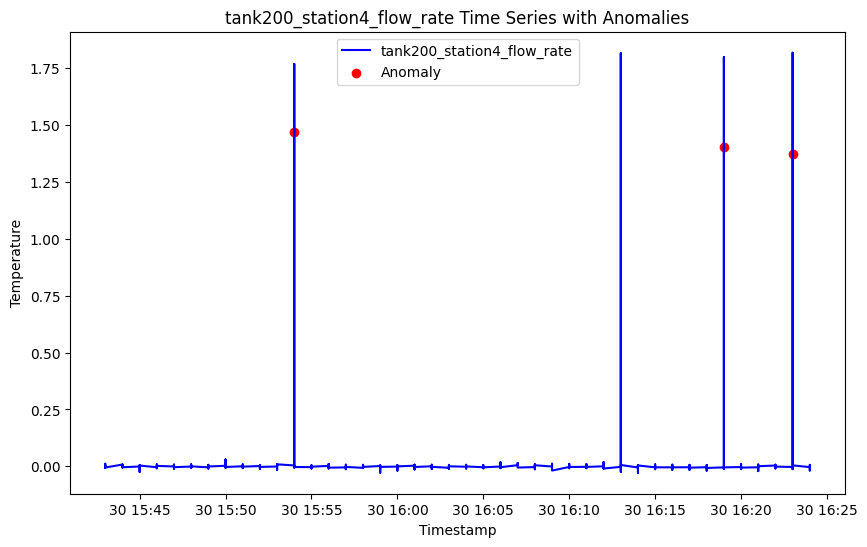

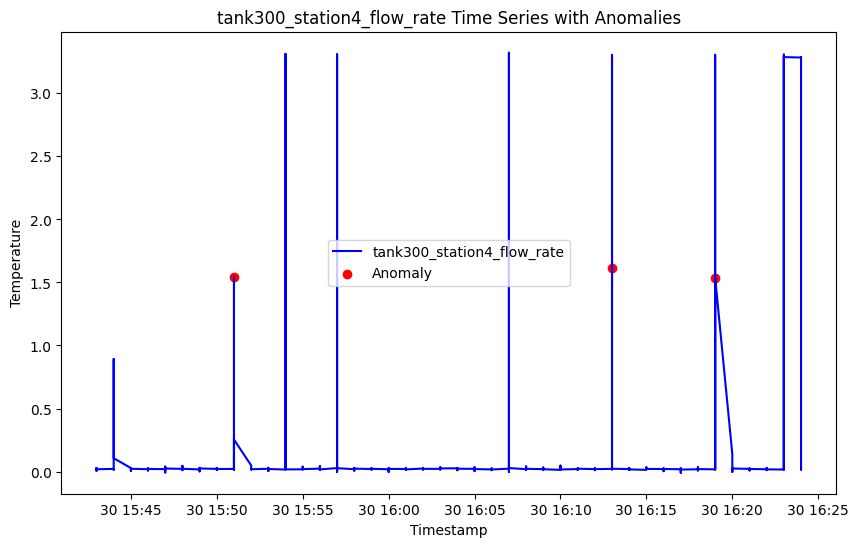

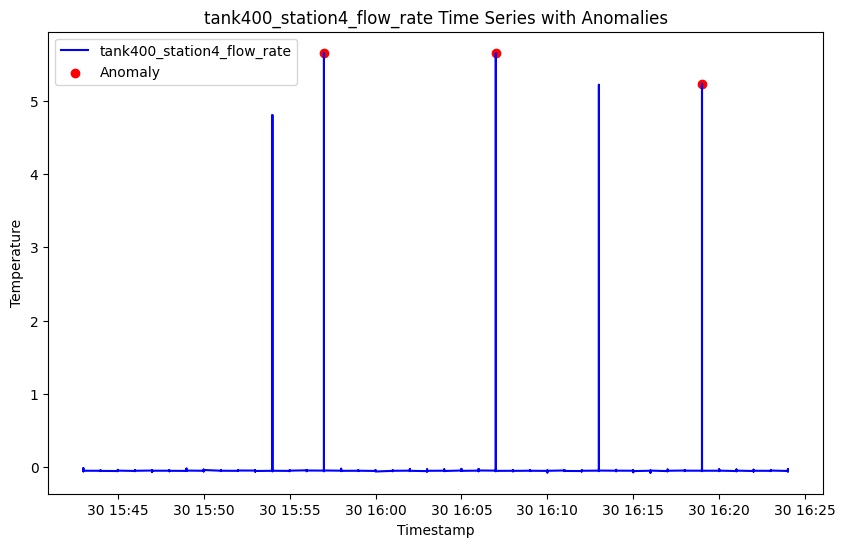

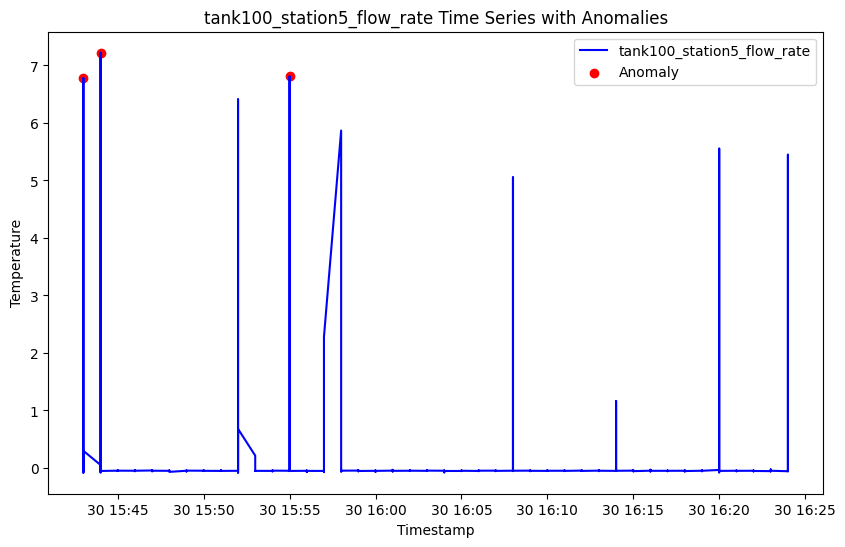

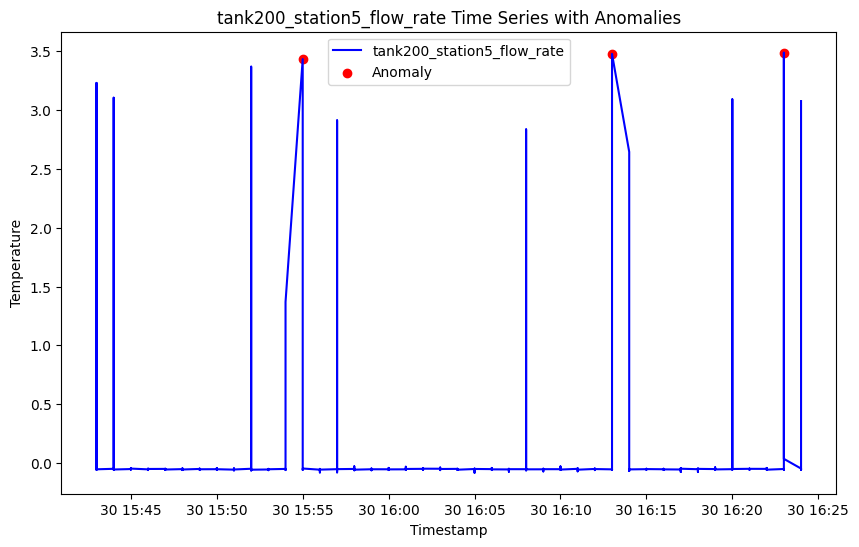

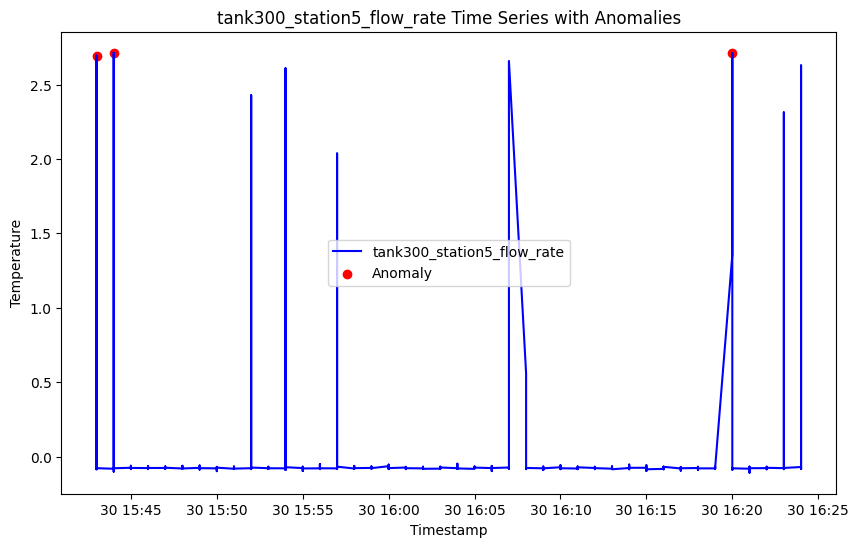

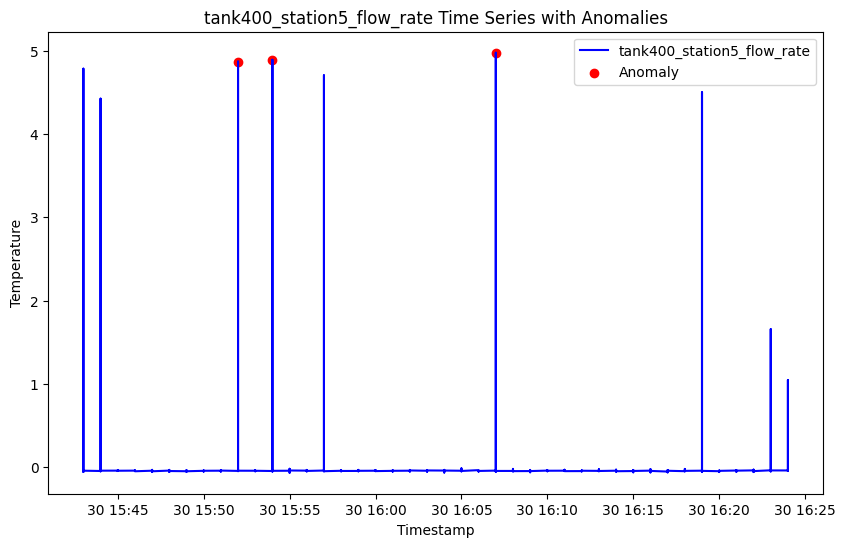

In [50]:
# Iterate over each pair of temperature and anomaly columns
for col in anomaly_columns:
    # Plot the time series data
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(output_df['Timestamp'], output_df[col], color='blue', label=col)

    # Highlight anomaly values in red
    anomaly_indices = output_df[output_df[col+'_is_anomaly'] == -1].index
    anomaly_values = output_df.loc[anomaly_indices, col]
    plt.scatter(output_df.loc[anomaly_indices, 'Timestamp'], anomaly_values, color='red', label='Anomaly')

    # Add labels and title
    plt.xlabel('Timestamp')
    plt.ylabel('Temperature')
    plt.title(f'{col} Time Series with Anomalies')
    plt.legend()

    # Show plot
    plt.show()


In [58]:
# Iterate over each pair of temperature and anomaly columns
for col in anomaly_columns:
    # Plot the time series data
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    plt.plot(output_df['Timestamp'], output_df[col], color='blue', label=col)

    # Highlight anomaly values in red
    anomaly_indices = output_df[output_df[col+'_is_anomaly'] == -1].index
    anomaly_values = output_df.loc[anomaly_indices, col]
    plt.scatter(output_df.loc[anomaly_indices, 'Timestamp'], anomaly_values, color='red', label='Anomaly')

    # Add labels and title
    plt.xlabel('Timestamp')
    plt.ylabel(col)
    plt.title(f'{col} Time Series with Anomalies')
    plt.legend()

    # Save plot as PNG file
    plt.savefig(f'reports/{col}_time_series_with_anomalies.png')

    # Close the plot to free up memory
    plt.close()

KeyError: 'tank100_temperature'

<Figure size 1000x600 with 0 Axes>

In [31]:
from prophet import Prophet

# Load the dataset
file_path = '/Users/yogithapalukuri/Desktop/capstone_project/df_clean_v2.csv'
df = pd.read_csv(file_path)

# Convert 'Timestamp' to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Prepare the data for Prophet
prophet_df = df[['Timestamp', 'tank100_temperature']]
prophet_df.rename(columns={'Timestamp': 'ds', 'tank100_temperature': 'y'}, inplace=True)

# Initialize and fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a future dataframe for the next 5 minutes, 1-second frequency
future = model.make_future_dataframe(periods=300, freq='S')
forecast = model.predict(future)

# Display the forecast
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()  # Showing the last few rows of the forecasted data

/var/folders/b9/79c0vj9575g01hz6pjr3n7800000gn/T/ipykernel_7586/3092546090.py:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Timestamp'] = pd.to_datetime(df['Timestamp'])
/var/folders/b9/79c0vj9575g01hz6pjr3n7800000gn/T/ipykernel_7586/3092546090.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prophet_df.rename(columns={'Timestamp': 'ds', 'tank100_temperature': 'y'}, inplace=True)
15:29:54 - cmdstanpy - INFO - Chain [1] start processing
15:29:55 - cmdstanpy - INFO - Chain [1] done processing
/Users/yogithapalukuri/Desktop/capstone_project/myvenv/lib/python3.12/site-packages/prophet/forecaster.py:1854: FutureWarning: 'S' is deprecated and will be removed i

,ds,yhat,yhat_lower,yhat_upper
337,2024-04-30 16:28:56,71.044137,70.969659,71.129391
338,2024-04-30 16:28:57,71.044170,70.973777,71.128452
339,2024-04-30 16:28:58,71.044204,70.971217,71.128620
340,2024-04-30 16:28:59,71.044237,70.972794,71.127003
341,2024-04-30 16:29:00,71.044271,70.967897,71.132249


In [57]:
import pandas as pd
from sklearn.ensemble import IsolationForest

# Simulate a forecast DataFrame (assuming 'forecast' from previous message was intended to be structured like this)
last_timestamp = df['Timestamp'].max()
future_timestamps = pd.date_range(start=last_timestamp, periods=300, freq='S')
yhat_values = np.random.normal(loc=df['tank100_temperature'].mean(), scale=df['tank100_temperature'].std(), size=300)

# Creating a forecast DataFrame
forecast = pd.DataFrame({
    'ds': future_timestamps,
    'yhat': yhat_values
})

# Merge the forecast with the historical data
df['Timestamp'] = pd.to_datetime(df['Timestamp'])  # Ensure Timestamp is datetime
combined_df = df.merge(forecast, left_on='Timestamp', right_on='ds', how='outer')

# Fit Isolation Forest on the historical 'tank100_temperature'
iso_forest = IsolationForest(n_estimators=100, contamination=0.01)  # Adjust contamination as necessary
iso_forest.fit(combined_df[['tank100_temperature']].dropna())  # Training on non-null historical data

# Predict anomalies including the forecasted data (using 'yhat')
combined_df['anomaly'] = iso_forest.predict(combined_df[['tank100_temperature']].fillna(combined_df['yhat']))

# Display results
combined_df[['Timestamp', 'tank100_temperature', 'yhat', 'anomaly']].tail()


/var/folders/b9/79c0vj9575g01hz6pjr3n7800000gn/T/ipykernel_7586/2546952545.py:6: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  future_timestamps = pd.date_range(start=last_timestamp, periods=300, freq='S')


ValueError: Input X contains NaN.
IsolationForest does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

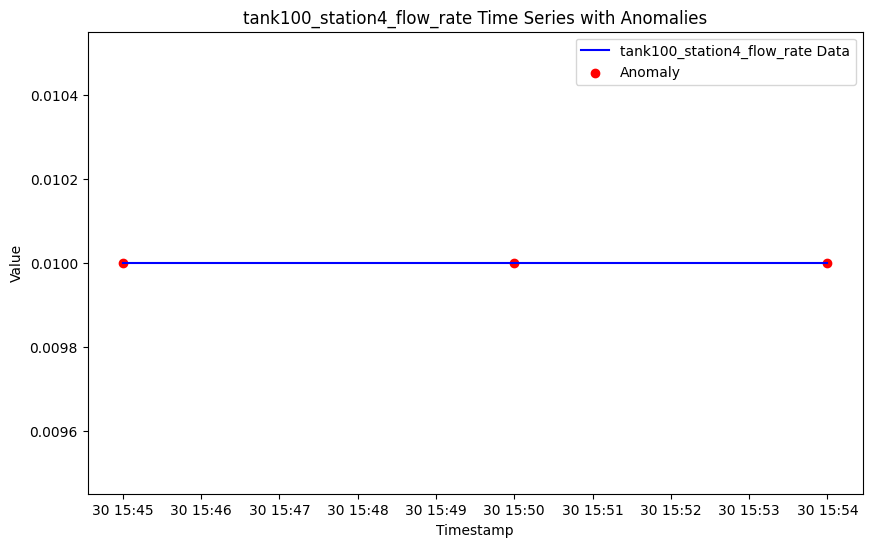

In [55]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
data = {
    'Timestamp': pd.date_range(start='2023-04-30 15:45', periods=10, freq='1min'),
    'tank100_station4_flow_rate': [0.01] * 10  # Constant value for simplicity
}
output_df = pd.DataFrame(data)

# Function to plot with blue line and red anomalies
def plot_with_anomalies(df, column, anomaly_indices):
    plt.figure(figsize=(10, 6))
    # Plot the data with a blue line
    plt.plot(df['Timestamp'], df[column], 'b-', label=f'{column} Data')

    # Overlay the anomalies as red dots
    anomaly_values = df.loc[anomaly_indices, column]
    plt.scatter(df.loc[anomaly_indices, 'Timestamp'], anomaly_values, color='red', label='Anomaly')

    plt.xlabel('Timestamp')
    plt.ylabel('Value')
    plt.title(f'{column} Time Series with Anomalies')
    plt.legend()
    plt.show()

# Specify indices where anomalies occur (change this according to your data)
anomaly_indices = [0, 5, 9]

# Call the function
plot_with_anomalies(output_df, 'tank100_station4_flow_rate', anomaly_indices)
